[IPython Notebook](sun_earth.ipynb) |  [Python Script](sun_earth.py)

Sun-Earth System
============================

**NOTE: planets are currently under testing and not yet supported**

Setup
-----------------------------

As always, let's do imports and initialize a logger and a new bundle.  See [Building a System](../tutorials/building_a_system.html) for more details.

In [1]:
%matplotlib inline

In [2]:
import phoebe
from phoebe import u # units
from phoebe import c # constants
import numpy as np
import matplotlib.pyplot as plt

logger = phoebe.logger(clevel='INFO')

b = phoebe.default_binary(starA='sun', starB='earth', orbit='earthorbit')

/usr/local/lib/python2.7/dist-packages/IPython/kernel/__init__.py:13: ShimWarning: The `IPython.kernel` package has been deprecated. You should import from ipykernel or jupyter_client instead.
  "You should import from ipykernel or jupyter_client instead.", ShimWarning)


/usr/local/lib/python2.7/dist-packages/astropy/units/quantity.py:732: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  return super(Quantity, self).__eq__(other)


Setting Parameters
---------------------------

In [3]:
b.set_value('teff@sun', 1.0*u.solTeff)
b.set_value('rpole@sun', 1.0*u.solRad)

b.flip_constraint('period@sun', solve_for='syncpar')
b.set_value('period@sun', 24.47*u.d)
#b.set_value('incl', 23.5*u.deg)

In [4]:
b.set_value('teff@earth', 252*u.K)
b.set_value('rpole@earth', 1.0*c.R_earth)

b.flip_constraint('period@earth', solve_for='syncpar')
b.set_value('period@earth', 1*u.d)

In [5]:
b.set_value('sma@earthorbit', 1*u.AU)
b.set_value('period@earthorbit', 1*u.yr)
b.set_value('q@earthorbit', c.M_earth/c.M_sun)

#b.set_value('ecc@earthorbit')

In [6]:
print("Msun: {}".format(b.get_quantity('mass@sun@component', unit=u.solMass)))
print("Mearth: {}".format(b.get_quantity('mass@earth@component', unit=u.solMass)))

Msun: 1.00003477935 solMass
Mearth: 3.00451679349e-06 solMass


Running Compute
--------------------

In [7]:
b.add_dataset('mesh', times=[0.5], dataset='mesh01')

<ParameterSet: 1 parameters>

In [8]:
b.add_dataset('lc', times=np.linspace(-0.5,0.5,51), dataset='lc01')

<ParameterSet: 11 parameters | kinds: lc, lc_dep>

In [9]:
b.set_value('ld_func@earth', 'logarithmic')
b.set_value('ld_coeffs@earth', [0.0, 0.0])

We'll have the sun follow a roche potential and the earth follow a rotating sphere (rotstar).

**NOTE**: this doesn't work yet because the rpole<->potential is still being defined by roche, giving the earth a polar radius way too small.

In [10]:
b.add_compute()
b['distortion_method@earth'] = 'rotstar'

The temperatures of earth will fall far out of bounds for any atmosphere model, so let's set the earth to be a blackbody and use a supported limb-darkening model (the default 'interp' is not valid for blackbody atmospheres).

In [11]:
b['atm@earth'] = 'blackbody'
b.set_value_all('ld_func@earth', 'logarithmic')
b.set_value_all('ld_coeffs@earth', [0, 0])

In [12]:
b.run_compute()

<ParameterSet: 64 parameters | kinds: mesh, lc>

/usr/local/lib/python2.7/dist-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


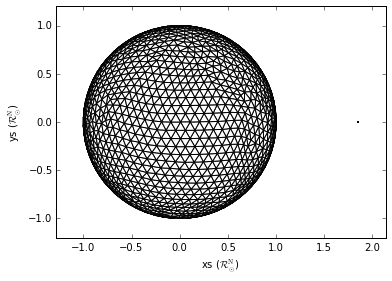

In [13]:
axs, artists = b.plot(dataset='mesh01')

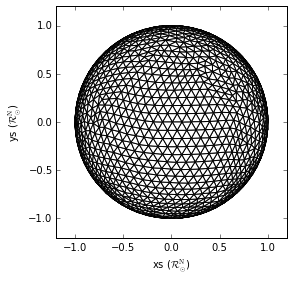

In [14]:
axs, artists = b.plot(dataset='mesh01', component='sun')

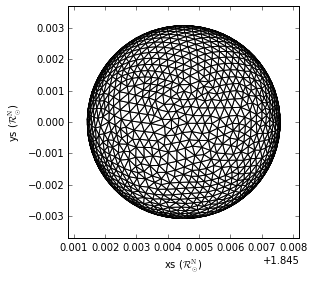

In [15]:
axs, artists = b.plot(dataset='mesh01', component='earth')

In [16]:
b['rpole@earth@component']

<Parameter: rpole=0.00916794020411 solRad | keys: description, value, quantity, default_unit, limits, visible_if, copy_for, timederiv>

In [17]:
b['ys@mesh01@earth'].get_value().max()

0.0030698629473366696

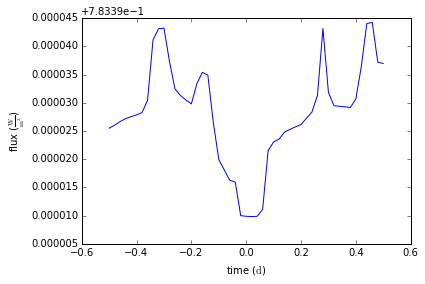

In [18]:
axs, artists = b.plot(dataset='lc01')